In [6]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

# 1

Like other gases, $CO_2$ is soluble in sea water. However, unlike other gases, $CO_2$ reacts with water to form free protons and conjugate bases.  The chemical reaction below explains the $CO_2$ hydration process:

$CO_{2(gas)} + H_2O \longleftrightarrow H_2CO_3^*$

The reaction above happens extremely quickly. The proton donor, $H_2CO_3^*$, dissociates in two steps to form bicarbonate and carbonate:

$H_2CO_3^* --> H^+ + HCO_3^-$

$HCO_3^- --> H^+ + CO_3^{2-}$

The pH of the ocean is about 8. At this pH, the concentration of $HCO_3^-$ (bicarbonate ion) is much higher than the concentrations of $H_2CO_3^*$ and $CO_3^{2-}$ (carbonate ion). In fact, 0.5% of the dissolved carbon in the ocean exists in the form of $H_2CO_3^*$, 10.9% exists in the form of carbonate, and 88.6% exists in the form of bicarbonate.  Because most of the $CO_2$ in the ocean is converted to bicarbonate, the amount of dissolved $CO_2$ in the ocean is decreased, allowing for more atmospheric diffusion of $CO_2$.  For this reason, there is much more Carbon in the ocean than in the atmosphere.

# 2

The equations below are used to determine the concentrations of carbonic acid, bicarbonate, and carbonate based on the pH, $pCO_2$, and the equilibrium constants:

$[H_2CO_3^*] = pCO_2 * K_0$

$[HCO_3^-] = \frac{K_0*K_1*pCO_2}{[H^+]}$

$[CO_3^{2-}] = \frac{K_0*K_1*K_2*pCO_2}{[H^+]^2}$

In [7]:
pH = 8.2 #pH of ocean
pCO2 = 300*10**(-6) #(atm) partial pressure of CO2
pK0 = 1.489
pK1 = 5.882
pK2 = 9.035
K0 = 10**(-pK0) # (mol/kg*atm)
K1 = 10**(-pK1) # (mol/kg)
K2 = 10**(-pK2) # (mol/kg)

H = 10**(-pH)

H2CO3 = pCO2*K0*10**6 #concentration carbonic acid
HCO3 = ((K0*K1*pCO2)/H)*10**6 #concentration bicarbonate
CO3 = ((K0*K1*K2*pCO2)/(H**2))*10**6 #concentration carbonate

print(f'The concentration of carbonic acid is {H2CO3:.3f} micro-mol/kg')
print(f'The concentration of bicarbonate is {HCO3:.3f} micro-mol/kg')
print(f'The concentration of carbonate is {CO3:.3f} micro-mol/kg')

The concentration of carbonic acid is 9.730 micro-mol/kg
The concentration of bicarbonate is 2023.584 micro-mol/kg
The concentration of carbonate is 295.884 micro-mol/kg


# 3
The equation below is used to determine the change in $pCO_2$ based on the original $pCO_2$ and a change in temperature:

$\frac{1}{pCO_2}\frac{\delta pCO_2}{\delta T} \approx 0.0423^\circ C^{-1}$ 

In [8]:
pCO2 = 300 #(micro-atm) partial pressure of CO2
dT = -5 #(deg C) Temperature drops 5C

dpCO2 = 0.0423*dT*pCO2

print(f'The change in surface ocean pCO2 due to a 5 degree C temperature drop is {dpCO2:0.3f} micro-atm')

The change in surface ocean pCO2 due to a 5 degree C temperature drop is -63.450 micro-atm


# 4

Solubility pump - $CO_2$ is more soluble in the cold, high latitude surface and invades the deep ocean through isopycnal transport. This pump contributes to the higher sDIC observed at high latitudes (above 60$^/circ$ N and S) and the deep-ocean intrusions of relatively high sDIC due to isopycnal transport from the high latitudes.

Soft tissue pump - The formation of organic matter near the surface reduces DIC and the remineralization of organic matter in the ocean interior increases the DIC.

Hard tissue pump - The precipitation of calcium carbonate near the surface reduces DIC and the dissolution of calcium carbonate in the interior increases DIC

In the mid-latudes and near the equator, the sDIC concentration generally decreases with depth from the surface to the interior.  This is due to both the soft and hard tissue pumps which decrease sDIC near the surface due to the formation of organic matter (soft pump) and precipitation of calcium carbonate (hard pump) and increase sDIC in the ocean interior due to remineralization (soft pump) and dissolution of calcium carbonate (hard pump).

# 5

### a
In response to calcium carbonate formation, we would expect DIC to decrease, Alkalinity to decrease, and $pCO_2$ to increase.

### b

The formula for DIC is: $DIC = [H_2CO_3^*] + [HCO_3^-] + [CO_3^{2-}]$.  Thus, if you form 10 mmol of $CaCO_3$ in 1 $m^3$, then you remove 10mmol/$m^3$ of $CO_3^{2-}$. Assuming the other concentrations remain constant, the change in DIC is then -10 mmol/$m^3$.

The formula for Alk is: $Alk = [HCO_3^-] + 2[CO_3^{2-}] + [OH^-] - [H^+] + [B(OH)_4^-]$.  Forming 10 mmol of $CaCO_3$ in 1 $m^3$ will remove 10mmol/$m^3$ of $CO_3^{-2}$. Assuming the other concentrations remain constant, the change in Alk is then -20 mmol/$m^3$.

### c

The equation below is used to determine the partial pressure of CO2:

$pCO_2 = \frac{K_2}{K_0*K_1} \frac{(2*DIC - Alk)^2}{Alk - DIC}$


In [19]:
pK0 = 1.489
pK1 = 5.882
pK2 = 9.035
K0 = (10**(-pK0)) # (mol/kg*atm)
K1 = (10**(-pK1)) # (mol/kg)
K2 = (10**(-pK2)) # (mol/kg)

DIC = 2000*10**-6 #mol/m^3
Alk = 2300*10**-6 #mol/m^3
pCO2 = (K2/(K1*K0))*((2*DIC-Alk)**2)/(Alk-DIC)

DICb = DIC-(10*10**-6) #mol/m^3
Alkb = Alk - (20*10**-6) #mol/m^3
pCO2b = (K2/(K1*K0))*((2*DICb-Alkb)**2)/(Alkb-DICb)
change = (pCO2b - pCO2)/pCO2*100

print(f'The original CO2 partial pressure is {pCO2*10**6:0.3f} micro-atm.  The new CO2 partial pressure is {pCO2b*10**6:0.3f} micro-atm, a {change:0.3f}% increase')

The original CO2 partial pressure is 208.822 micro-atm.  The new CO2 partial pressure is 216.023 micro-atm, a 3.448% increase


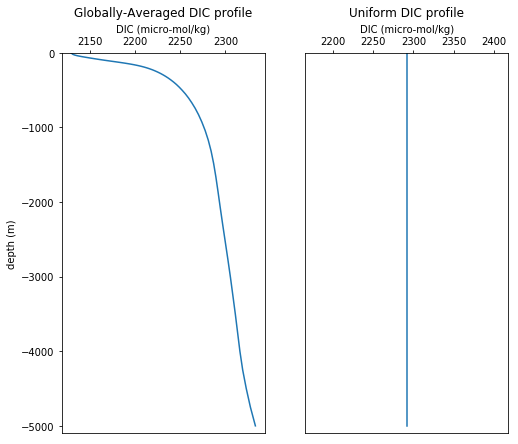

The new surface partial pressure of CO2 is 1188.554 micro-atm.  This is 798.554 micro-atm and 3.048 times larger than the present day value


In [15]:
##### ----- 6a ----- #####
profile = loadmat('DIC_profile.mat')['DIC_profile']
depth = profile[:,0]
DIC = profile[:,1]

##### ----- 6b ----- #####
uniform_DIC = np.trapz(DIC, x = depth)/depth[-1] 
DICb = np.zeros(len(DIC))
DICb[:] = uniform_DIC

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

fig,[ax1,ax2] = plt.subplots(1,2,figsize=(8,7))

ax1.plot(DIC,depth)  
ax1.set_xlabel('DIC (micro-mol/kg)')
ax1.xaxis.set_label_position('top') 
ax1.set_ylabel('depth (m)')
ax1.set_title('Globally-Averaged DIC profile', y=1.08)
ax1.set_ylim([-5100,0])

ax2.plot(DICb,depth)  
ax2.set_xlabel('DIC (micro-mol/kg)')
ax2.xaxis.set_label_position('top') 
ax2.set_ylabel('depth (m)')
ax2.set_title('Uniform DIC profile', y=1.08)
ax2.get_yaxis().set_visible(False)
ax2.set_ylim([-5100,0])

plt.show()

##### ----- 6c ----- #####
pCO2 = 390*10**-6 # (atm) present CO2 partial pressure
Alk = 2380 # (micro-mol/kg) surface alkilinity
DIC_surface = DICb[0] # (micro-mol/kg) surface DIC
pK0 = 1.489
pK1 = 5.882
pK2 = 9.035
K0 = (10**(-pK0))*10**6 # (micro-mol/kg*atm)
K1 = (10**(-pK1))*10**6 # (micro-mol/kg)
K2 = (10**(-pK2))*10**6 # (micro-mol/kg)

pCO2b = (K2/(K1*K0))*((2*DIC_surface-Alk)**2)/(Alk-DIC_surface)
change = pCO2b - pCO2
change2 = pCO2b/pCO2
print(f'The new surface partial pressure of CO2 is {pCO2b*10**6:.3f} micro-atm.  This is {change*10**6:0.3f} micro-atm and {change2:.3f} times larger than the present day value')